## Importance and rejection sampling, Philippe and Robert method

# 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
import sympy as sym
from sympy import *
from scipy import stats

# a.

### Importance Sampling

In [2]:
n = 50000
x = np.random.normal(0, 1, n)

In [3]:
f = np.exp(-abs(x)**3/3)
g = norm.pdf(x)
w_star = f/g
w = w_star/np.sum(w_star)
mu_IS = np.sum(x**2*w)

$\sigma^{2}$ estimate using Importance Sampling

In [4]:
mu_IS

0.7774049965231634

# b.

### Rejection Sampling

In [5]:
x = sym.Symbol('x')
f = exp(-np.abs(x)**3/3)
g = lambdify(x,f, 'numpy')

In [6]:
def reject_sampling(g,n):
    s = []
    for i in range(n):
        z = np.random.normal(0, 1, 1)
        u = np.random.uniform(0, 1)
        if u <= g(z)/(3*norm.pdf(z)):
             s.append(z)
    return s, np.var(s)

$\sigma^{2}$ estimate using Rejection Sampling

In [7]:
s , estimate = reject_sampling(g,50000)
print(estimate)

0.7762779935301007


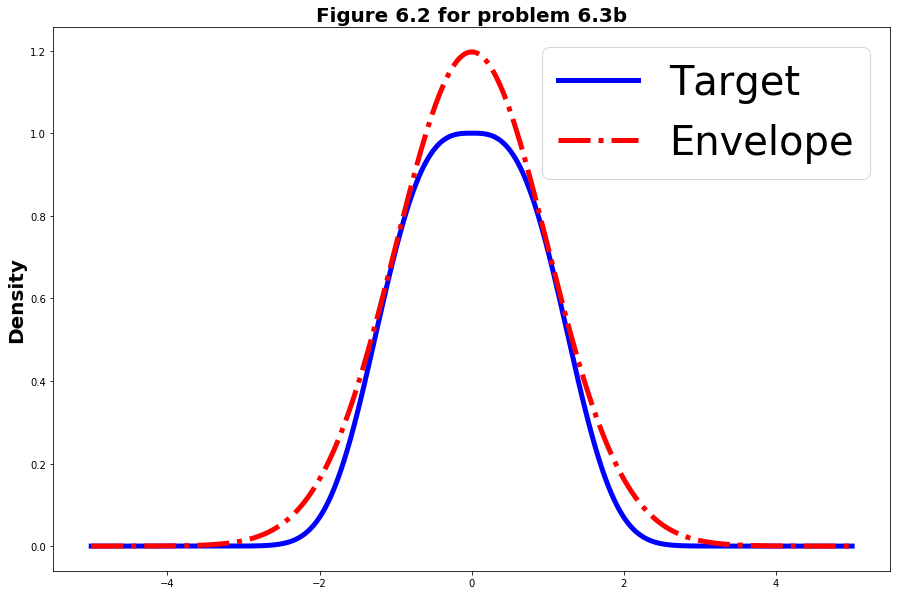

In [8]:
x= np.linspace(-5,5, 5000)
plt.figure(figsize=(15,10))
plt.plot(x, g(x),'b',lw=5)
plt.plot(x, 3*norm.pdf(x),'r-.',lw=5)
plt.ylabel('Density',weight='bold',fontsize=20)
plt.title('Figure 6.2 for problem 6.3b',weight='bold',fontsize=20)
plt.legend(['Target','Envelope'],fontsize=40)
plt.show()

# C.

### Philippe and Robert

In [9]:
s.sort()
S = np.array(s)
diff = S[1:]-S[0:len(s)-1]
est_h = np.sum(diff*np.power(S[0:len(S)-1],2)*g(S[0:len(S)-1]))/np.sum(diff*g(S[0:len(S)-1])) 

$\sigma^{2}$ estimate using Philippe and Robert method

In [10]:
est_h

0.775874731444664

# d.

In [11]:
var_s = np.zeros(100)
est_h = np.zeros(100)
for i in range(0,100):
    s , var_s[i] = reject_sampling(g,50000)
    s.sort()
    S = np.array(s)
    diff = S[1:]-S[0:len(s)-1]
    est_h[i] = np.sum(diff*np.power(S[0:len(S)-1],2)*g(S[0:len(S)-1]))/np.sum(diff*g(S[0:len(S)-1])) 

In [12]:
def kernel_smooth(data,n):
    kde = stats.gaussian_kde(data)
    lambda_ks = np.linspace(data.min(), data.max(), n)
    f_lambda_ks = kde(lambda_ks)
    return lambda_ks, f_lambda_ks

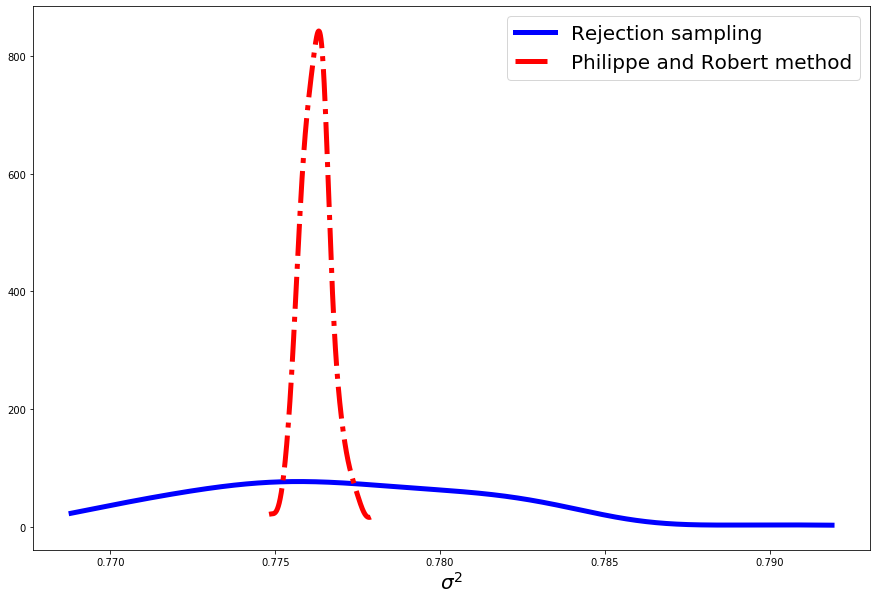

In [13]:
lambda_ks,f_lambda_ks = kernel_smooth(var_s,1000) 
plt.figure(figsize=(15,10))
plt.plot(lambda_ks,f_lambda_ks,'b',lw=5)

lambda_ks,f_lambda_ks = kernel_smooth(est_h,1000)
plt.plot(lambda_ks,f_lambda_ks,'r-.',lw=5)
plt.xlabel(r'$\sigma^{2}$',weight='bold',fontsize=20)
plt.legend(['Rejection sampling','Philippe and Robert method'],fontsize=20)
plt.show()

Both methods show that the estimate value is close to the true value of $\sigma^{2}$. However, the variance for Philipe and Robert estimator is larger than the Rejection Sampling method.